In [77]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from matplotlib.markers import MarkerStyle
from matplotlib.colors import Normalize

# Experiment Setup

```
Query 1
ITR: 2 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000
DVFS: 0c00 0d00 0e00 0f00 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 1a00 
RATE: 100000 200000 300000 400000
NSOURCES: 16
NMAPPERS: 16
NSINKS: 16
```

In [114]:
df_comb = pd.read_csv("mapper16/combined.csv")
#df_comb = df_comb[(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate']) > 0.95]
df_comb["SourcenumRecordsOutPerSecond_percent"] = 1.0-(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate'])
df_comb["SourcenumRecordsOutPerSecond_percent"] = df_comb["SourcenumRecordsOutPerSecond_percent"].apply(lambda x: 0.0 if x <= 0.0 else x)
df_comb["ratek"] = df_comb['SourcenumRecordsOutPerSecond_avg']/1000.0
df_comb["itrm"] = df_comb["itr"]/1000.0

def graph(rate, dfo, dfu, dfpo, dfpe, dfs, left=-0.1, right=1.1, metric='SourcenumRecordsOutPerSecond_percent'):
    plt.rcParams['figure.figsize'] = 8, 10
    plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

    fig, ax = plt.subplots()

    scatter_c1 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=400, c=dfu.itrm, edgecolor="black", 
                            cmap='Blues', marker=MarkerStyle("o", fillstyle="right"), label="userspace", alpha=0.8)

    scatter_c2 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=400, c=dfu.dvfs, edgecolor="black", 
                            cmap='Reds', marker=MarkerStyle("o", fillstyle="left"), alpha=0.8)

    ax.scatter(dfo[metric].tolist(),
                            dfo['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='lime',
                           marker=MarkerStyle("o"), label="ondemand")
    
    ax.scatter(dfpo[metric].tolist(),
                            dfpo['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='cyan',
                           marker=MarkerStyle("o"), label="powersave")

    ax.scatter(dfpe[metric].tolist(),
                            dfpe['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='magenta',
                           marker=MarkerStyle("o"), label="performance")

    ax.scatter(dfs[metric].tolist(),
                            dfs['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='yellow',
                           marker=MarkerStyle("o"), label="schedutil")

    # Add colorbars
    cbar_c1 = plt.colorbar(scatter_c1, ax=ax, orientation='horizontal', label="ITR (ms)")
    cbar_c2 = plt.colorbar(scatter_c2, ax=ax, orientation='horizontal', label="DVFS (Ghz)")

    ax.set_xlabel('RPS (K)')
    ax.set_ylabel('Power (W)')
    ax.set_xlim(left=left, right=right)
    ax.set_ylim(bottom=50, top=110)

    ax.set_title(f"Query1 @ {int(rate)}K RPS", size=22)
    plt.legend(fontsize=22)
    plt.grid()
    plt.tight_layout()

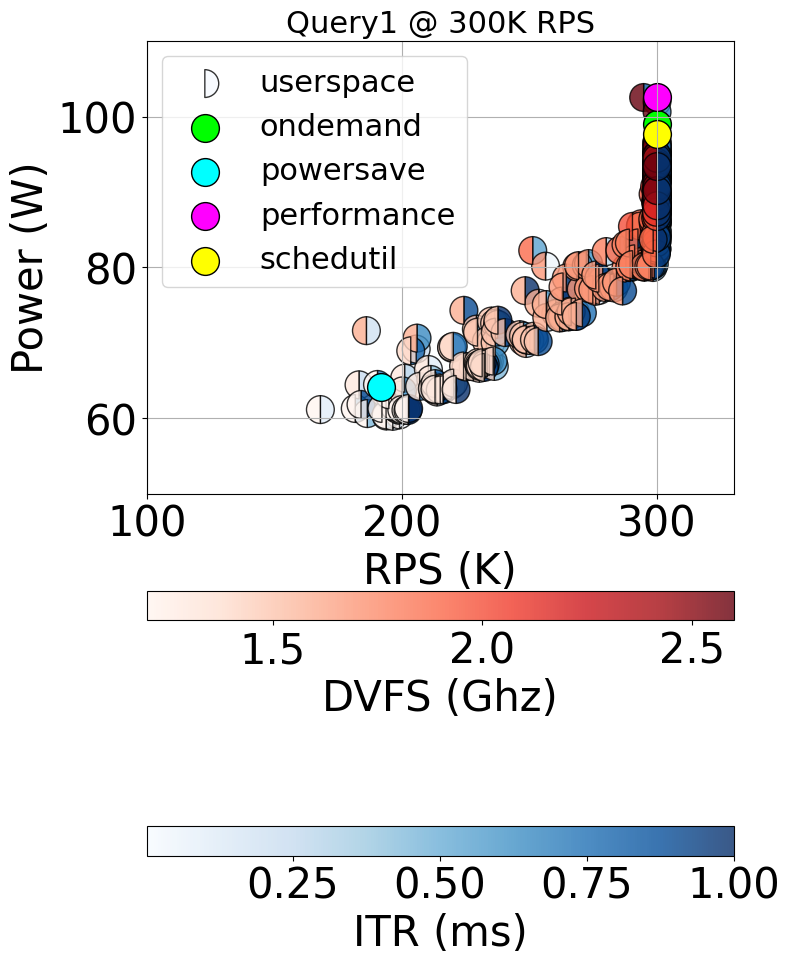

In [115]:
rate = 300000
ratek = rate/1000.0
dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 100, int(ratek+(ratek*0.10)), metric='ratek')
plt.savefig("query1itrdvfs.pdf", bbox_inches='tight')


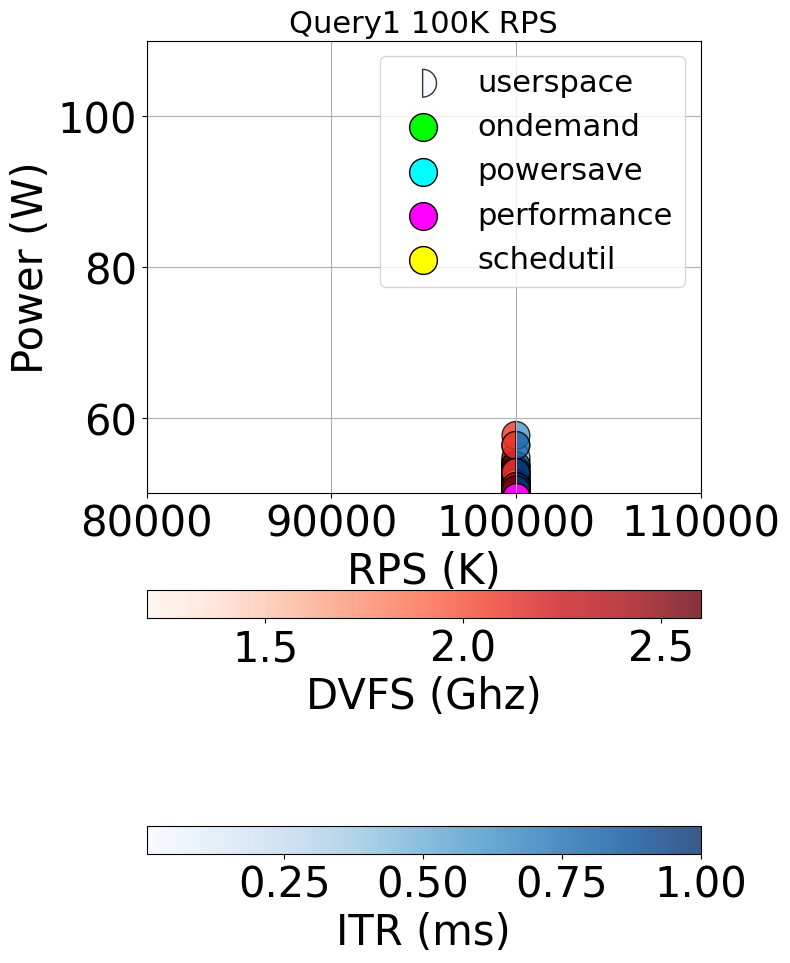

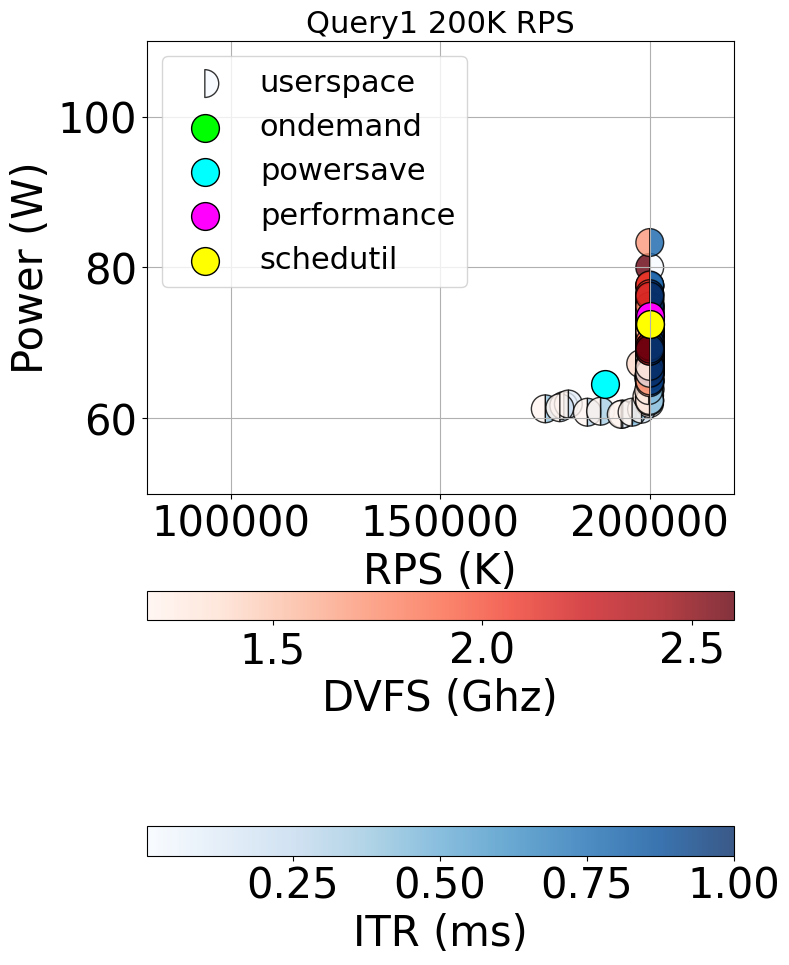

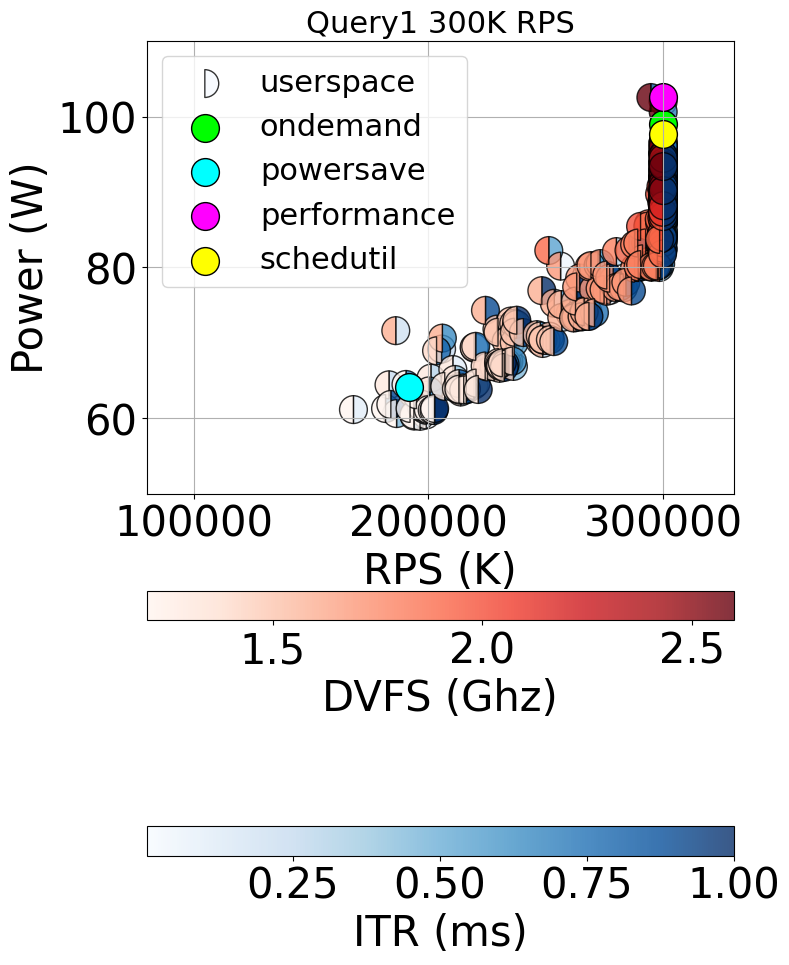

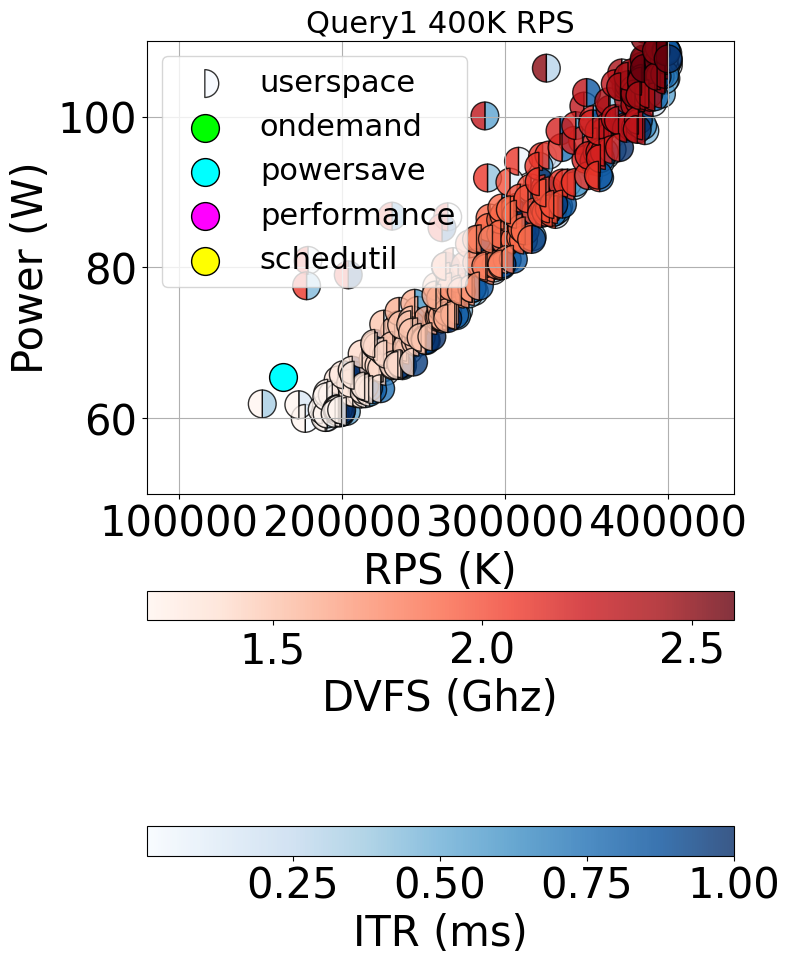

In [111]:
for rate in [100000, 200000, 300000, 400000]:
    dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
    dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
    dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
    dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
    dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
    graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 80000, int(rate+(rate*0.10)), metric='SourcenumRecordsOutPerSecond_avg')

In [21]:
df_comb = pd.read_csv("mapper8/combined.csv")
df_comb["SourcenumRecordsOutPerSecond_percent"] = 1.0-(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate'])
df_comb["SourcenumRecordsOutPerSecond_percent"] = df_comb["SourcenumRecordsOutPerSecond_percent"].apply(lambda x: 0.0 if x <= 0.0 else x)

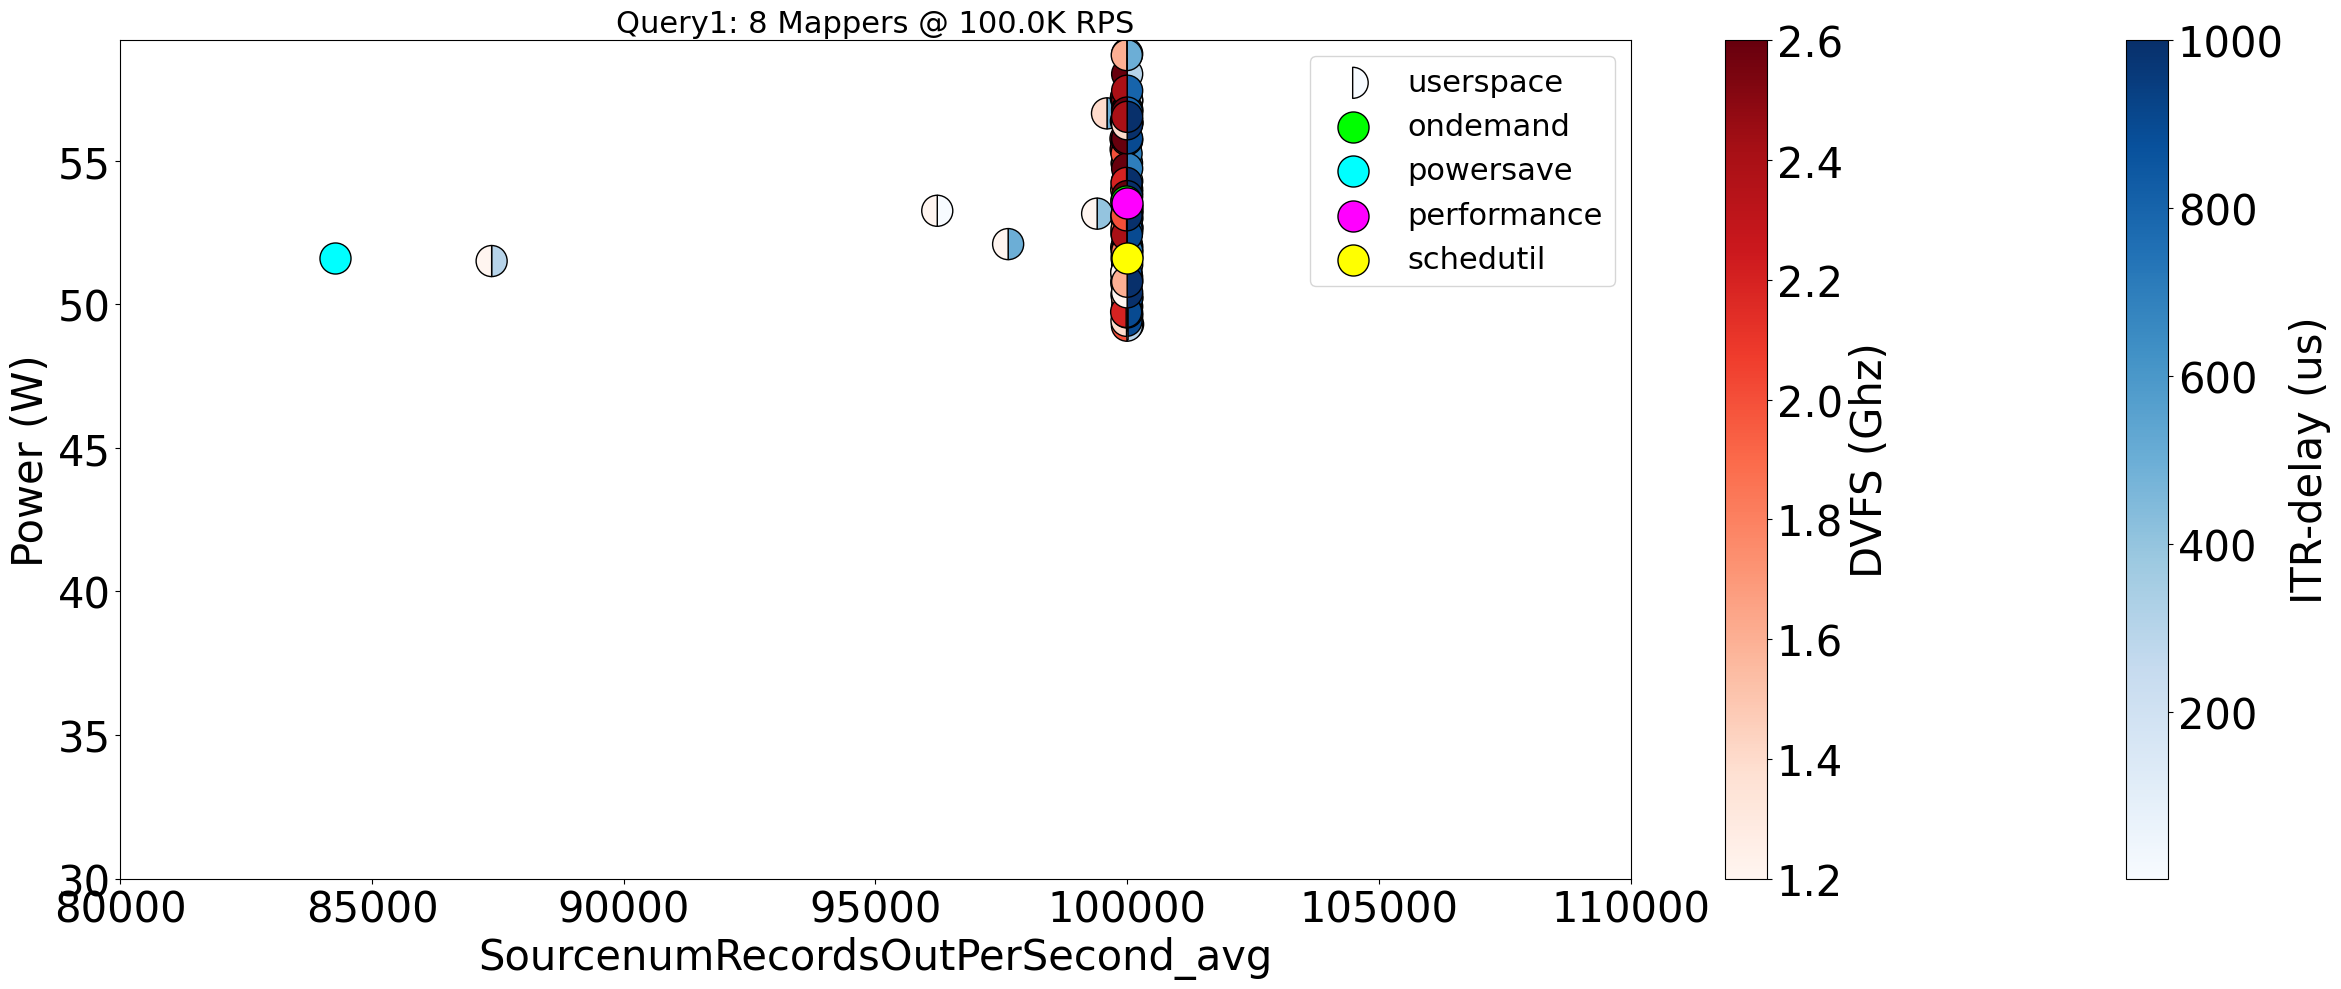

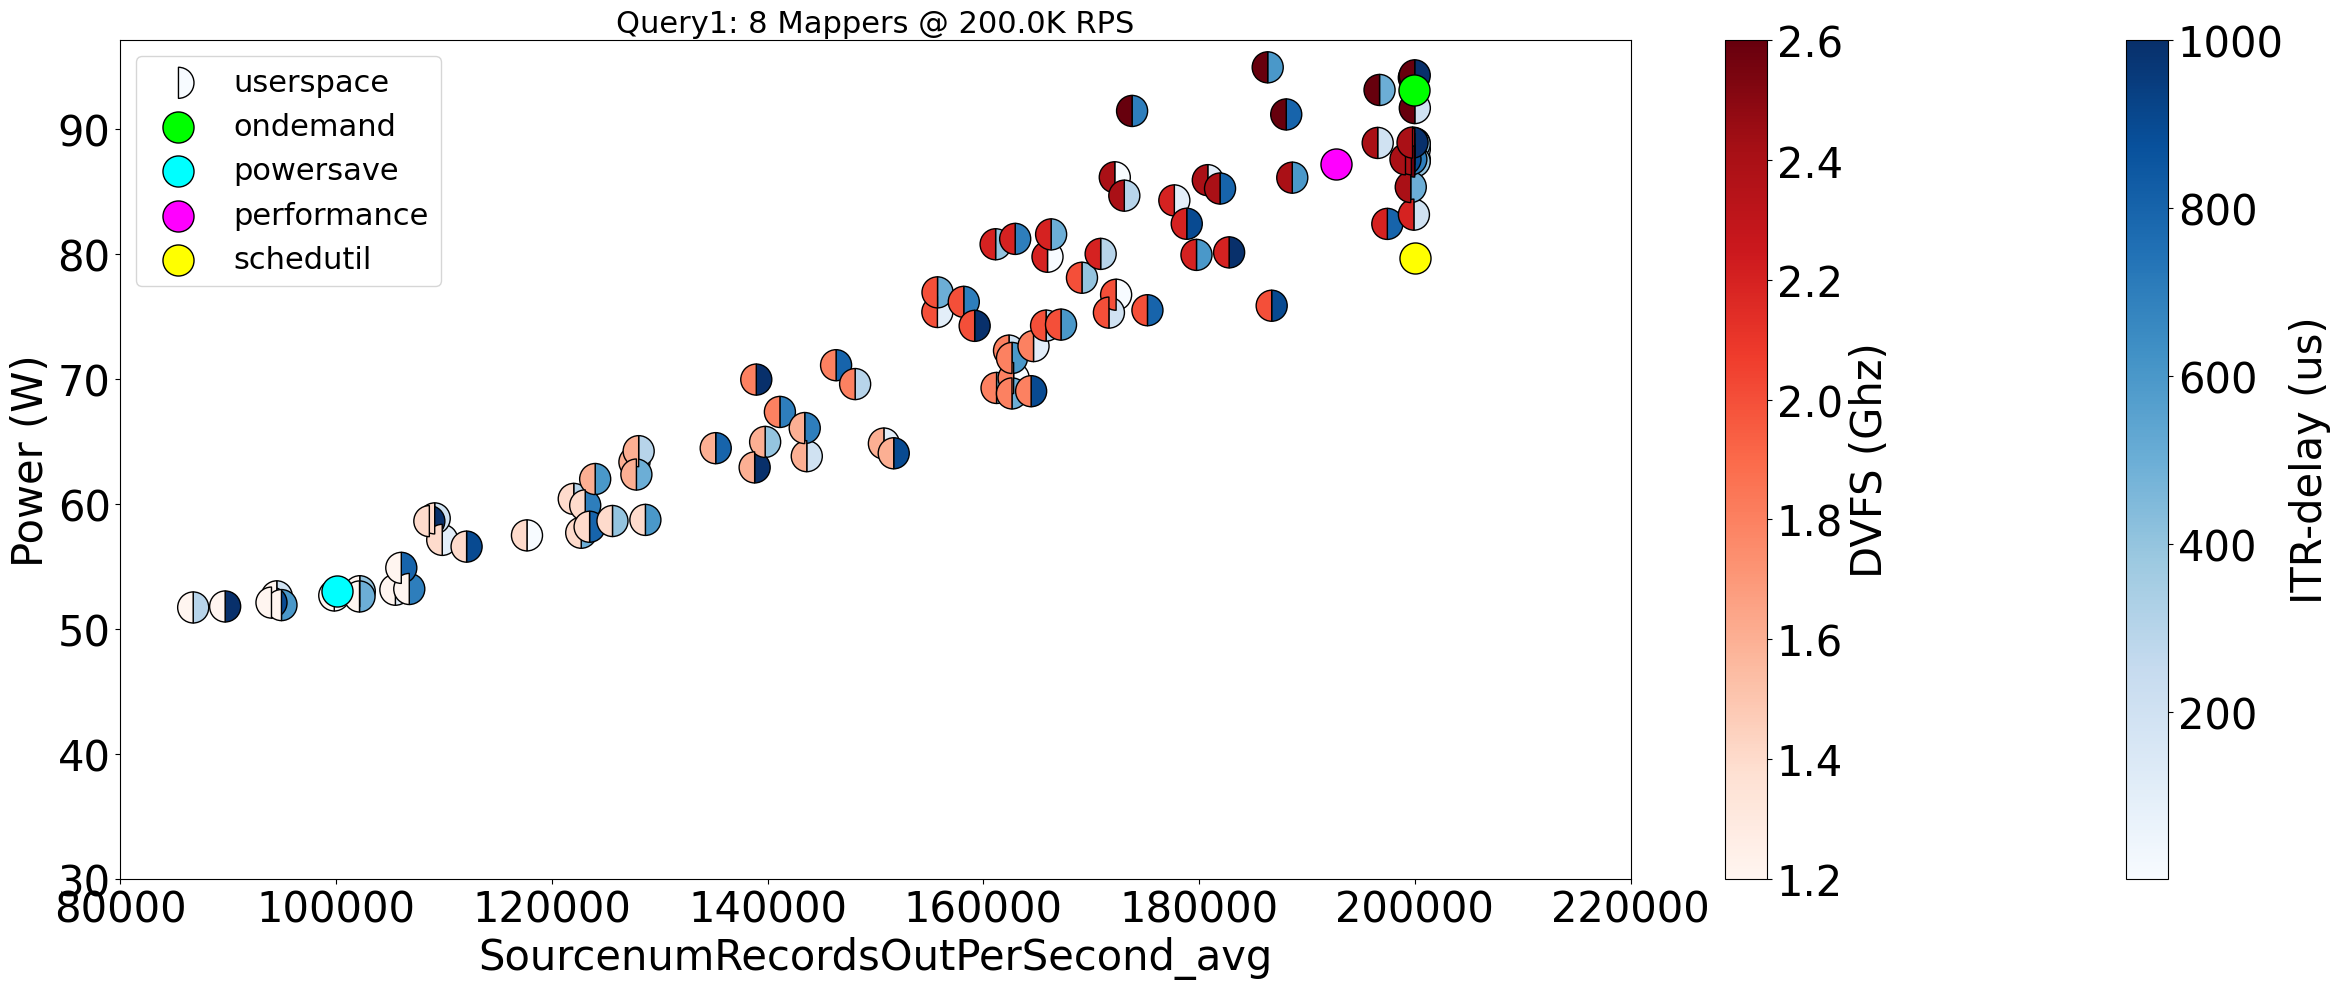

In [23]:
for rate in [100000, 200000]:
    dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
    dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
    dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
    dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
    dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
    graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 80000, int(rate+(rate*0.10)), metric='SourcenumRecordsOutPerSecond_avg') 